In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

from utils import *

In [5]:
# import data into dataframe
df_feature = pd.read_csv('feature_data.zip', compression = 'zip').drop(columns=['Unnamed: 0'])
df_labels = pd.read_csv('label_data.zip', compression = 'zip').drop(columns=['Unnamed: 0'])

In [11]:
# whatever path your data is at
path=Path('C:/Users/smaes/OneDrive/to_be_desktop/columbia_masters/2021_f/genomics/genomics_project/2021f_genomics_project')

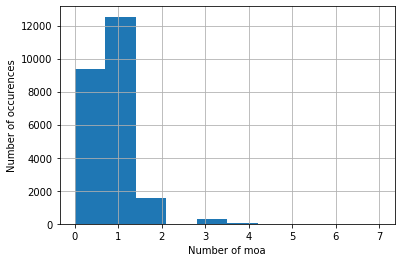

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.3,
            train_size=None)
StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.7,
            train_size=None)


In [12]:
# load data
df_feature, df_labels, df_raw = read_data(path)

# get number of moa per row, and plot histogram
n_moa = get_n_moa(df_labels)
get_plot_n_moa(df_labels)

# remove labels that occur less than min_label_occur param
sel_labels, sel_raw = sel_labels_by_occur(df_labels, df_raw, min_label_occur=100)
# remove ids that have more than 1 moa or less than 1 moa
n_moa_feature, n_moa_labels = get_n_moa_per_row(df_feature, sel_labels, n_moa_per_row=1)
# split data into test train and val
df_feat, df_lab = get_test_train_val(n_moa_feature, n_moa_labels)
# get split labels
train_labels, test_labels, val_labels = split_labels_train_test_val(df_lab)
# get split features in pandas DataFrame
train_features, test_features, val_features = split_features_train_test_val(df_feat, in_numpy=False)
# get split features in numpy ndarray
nptrain_features, nptest_features, npval_features = split_features_train_test_val(df_feat, in_numpy=True)